<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa pywavelets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.4 MB/s eta 0:00:00


In [5]:
import kagglehub, os
# Download latest version
path = kagglehub.dataset_download("mmoreaux/audio-cats-and-dogs")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mmoreaux/audio-cats-and-dogs/versions/5


In [3]:
source_dir = path + '/cats_dogs'

In [6]:
os.listdir(source_dir+'/test/test/')

['dog_barking_73.wav',
 'dog_barking_62.wav',
 'dog_barking_24.wav',
 'dog_barking_43.wav',
 'dog_barking_48.wav',
 'dog_barking_3.wav',
 'dog_barking_66.wav',
 'dog_barking_19.wav',
 'dog_barking_99.wav',
 'dog_barking_90.wav',
 'dog_barking_7.wav',
 'dog_barking_15.wav',
 'dog_barking_46.wav',
 'dog_barking_49.wav',
 'dog_barking_54.wav',
 'dog_barking_44.wav',
 'dog_barking_78.wav',
 'dog_barking_12.wav',
 'dog_barking_45.wav',
 'dog_barking_64.wav',
 'dog_barking_34.wav',
 'dog_barking_9.wav',
 'dog_barking_112.wav',
 'dog_barking_8.wav',
 'dog_barking_82.wav',
 'dog_barking_59.wav',
 'dog_barking_89.wav',
 'dog_barking_91.wav']

In [7]:
import librosa
import pywt
import numpy as np
import os
from sklearn.model_selection import train_test_split

def extract_wavelet_features(file_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(file_path, sr=None)
    # Aplicar la Transformada Wavelet
    coeffs = pywt.wavedec(y, 'db1', level=5)
    features = np.hstack(coeffs)

    return features

# Directorios de los archivos de audio
dog_dir = source_dir+'/train/dog'
cat_dir = source_dir+'/train/cat'


In [9]:
X = []
y = []
# Procesar archivos de perros
for file_name in os.listdir(dog_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(dog_dir, file_name)
        features = extract_wavelet_features(file_path)
        X.append(features)
        y.append(0)  # Etiqueta 0 para perros

# Procesar archivos de gatos
for file_name in os.listdir(cat_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(cat_dir, file_name)
        features = extract_wavelet_features(file_path)
        X.append(features)
        y.append(1)  # Etiqueta 1 para gatos



In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, dtype='float32', padding='post')


# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

#🎧 Análisis Espectrográfico de Audios de Perro y Gato

Una forma visual y descriptiva de analizar señales de audio es mediante el uso de espectrogramas, los cuales representan la energía de las frecuencias a lo largo del tiempo. En este análisis se utilizaron funciones de librosa para calcular y visualizar el espectrograma de un audio de perro y uno de gato.

El espectrograma muestra la intensidad de las frecuencias (eje vertical) a lo largo del tiempo (eje horizontal), donde los colores más cálidos (rojos y amarillos) indican mayor energía, y los colores más fríos (azules) menor energía.

Estos espectrogramas permiten observar diferencias en la distribución de frecuencias y la energía de cada clase. Por ejemplo, los sonidos de los perros tienden a tener una mayor concentración de energía en frecuencias medias y graves, mientras que los gatos pueden presentar patrones más agudos o dispersos, dependiendo del tipo de maullido.

Este tipo de análisis es fundamental para entender la estructura espectral de los sonidos y puede ser utilizado como base para tareas de clasificación o reconocimiento automático.

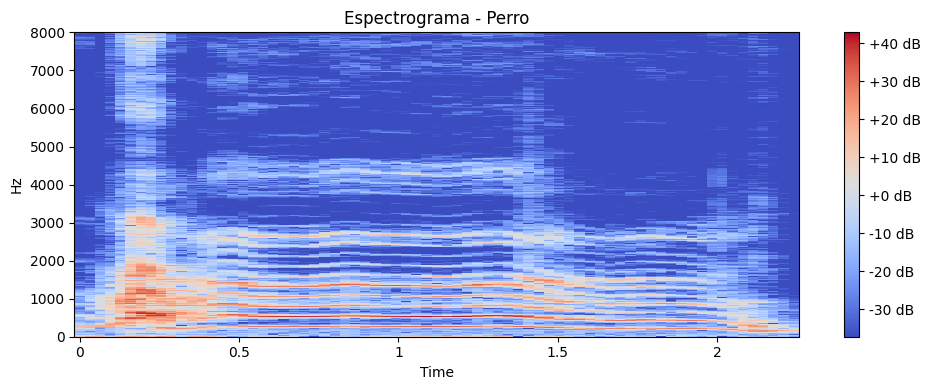

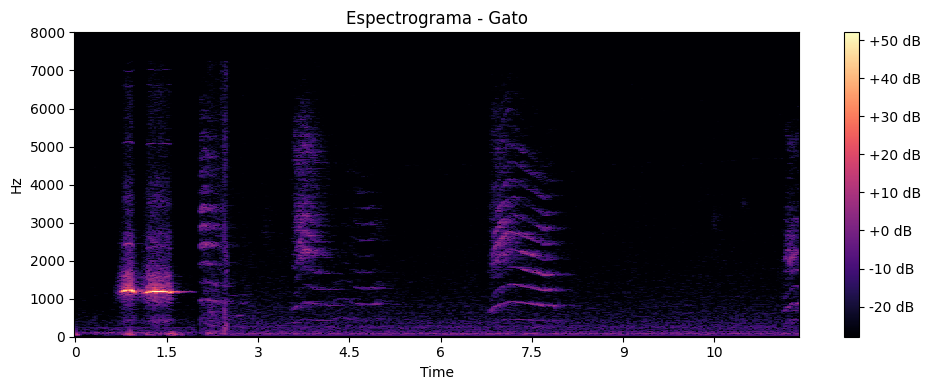

In [13]:
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    S = librosa.stft(y)
    S_dB = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Espectrograma - {title}")
    plt.tight_layout()
    plt.show()

# Ejemplo con un audio
y_dog, sr_dog = librosa.load(os.path.join(dog_dir, os.listdir(dog_dir)[0]), sr=None)
plot_spectrogram(y_dog, sr_dog, 'Perro')

y_cat, sr_cat = librosa.load(os.path.join(cat_dir, os.listdir(cat_dir)[0]), sr=None)
plot_spectrogram(y_cat, sr_cat, 'Gato')


#🎧 Análisis de Coeficientes Cepstrales en Frecuencia Mel (MFCC) de Audios de Perro y Gato

Los coeficientes cepstrales en frecuencia Mel (MFCC) son una representación común de las características acústicas de un audio. Este análisis descompone la señal de audio en diferentes bandas de frecuencia, emulando cómo el oído humano percibe las frecuencias. Los MFCC se utilizan comúnmente en tareas de clasificación de audios, como el reconocimiento de voz y la clasificación de sonidos.

A continuación, se presenta el cálculo y visualización de los MFCC para un audio de perro y uno de gato.

Estos gráficos muestran la evolución de los coeficientes MFCC a lo largo del tiempo. Se puede observar que los MFCC de los perros y gatos muestran patrones diferentes en la distribución de energía en las distintas bandas de frecuencia. Estas diferencias pueden reflejar las variaciones acústicas entre las vocalizaciones de perros y gatos.

Este análisis es útil para entender cómo se representan las características acústicas de los sonidos y puede ser utilizado para diferenciar entre clases de sonidos en tareas de clasificación automática.

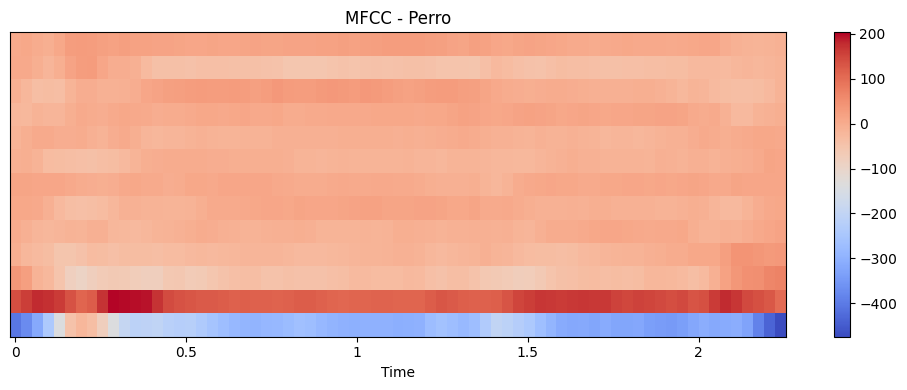

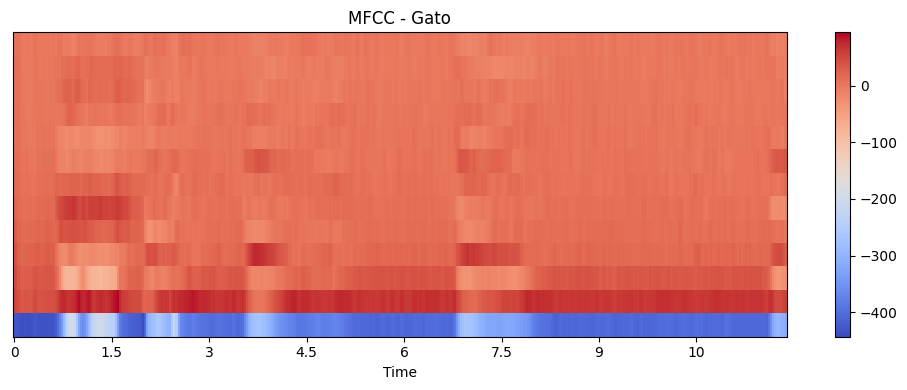

In [23]:
def extract_mfcc(y, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

mfcc_dog = extract_mfcc(y_dog, sr_dog)
mfcc_cat = extract_mfcc(y_cat, sr_cat)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_dog, sr=sr_dog, x_axis='time')
plt.title('MFCC - Perro')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_cat, sr=sr_cat, x_axis='time')
plt.title('MFCC - Gato')
plt.colorbar()
plt.tight_layout()
plt.show()

#🎧 Análisis de Duración de Audios de Perro y Gato

La duración de los audios es una característica importante a considerar en el análisis de sonidos. En este análisis, comparamos la duración de los audios de perros y gatos para observar si existe alguna diferencia notable en la longitud de las vocalizaciones.

El siguiente gráfico muestra la distribución de las duraciones de los archivos de audio de perros y gatos, en segundos. Se utilizaron 20 intervalos (bins) para construir el histograma y facilitar la comparación.

<ipython-input-19-75f6ebae6981>:1: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duraciones_dog = [librosa.get_duration(filename=os.path.join(dog_dir, f)) for f in os.listdir(dog_dir) if f.endswith('.wav')]
<ipython-input-19-75f6ebae6981>:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duraciones_cat = [librosa.get_duration(filename=os.path.join(cat_dir, f)) for f in os.listdir(cat_dir) if f.endswith('.wav')]


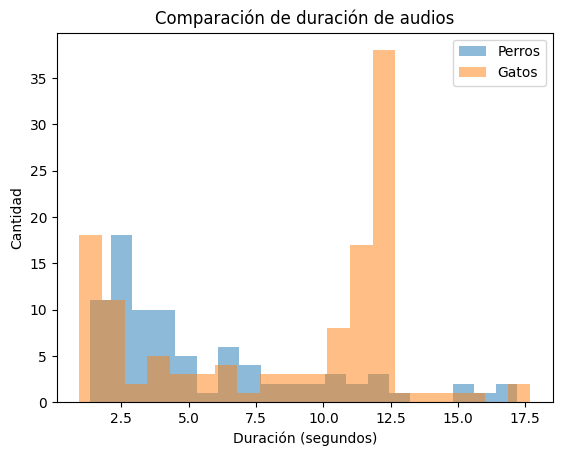

In [19]:
duraciones_dog = [librosa.get_duration(filename=os.path.join(dog_dir, f)) for f in os.listdir(dog_dir) if f.endswith('.wav')]
duraciones_cat = [librosa.get_duration(filename=os.path.join(cat_dir, f)) for f in os.listdir(cat_dir) if f.endswith('.wav')]

plt.hist(duraciones_dog, bins=20, alpha=0.5, label='Perros')
plt.hist(duraciones_cat, bins=20, alpha=0.5, label='Gatos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Cantidad')
plt.title('Comparación de duración de audios')
plt.legend()
plt.show()



#🎧 Análisis de Distribución de Coeficientes MFCC por Audio de Perro y Gato

En este análisis, se calcula la media de los coeficientes MFCC para los primeros 10 archivos de audio de perros y gatos. Luego, se compara la distribución de estos valores utilizando un boxplot. Este análisis nos permite observar cómo varían los coeficientes MFCC entre las dos clases de audio y si existen diferencias notables en la dispersión de los valores de los coeficientes.

El siguiente código extrae los coeficientes MFCC promedio de cada archivo de audio y genera un boxplot comparativo:

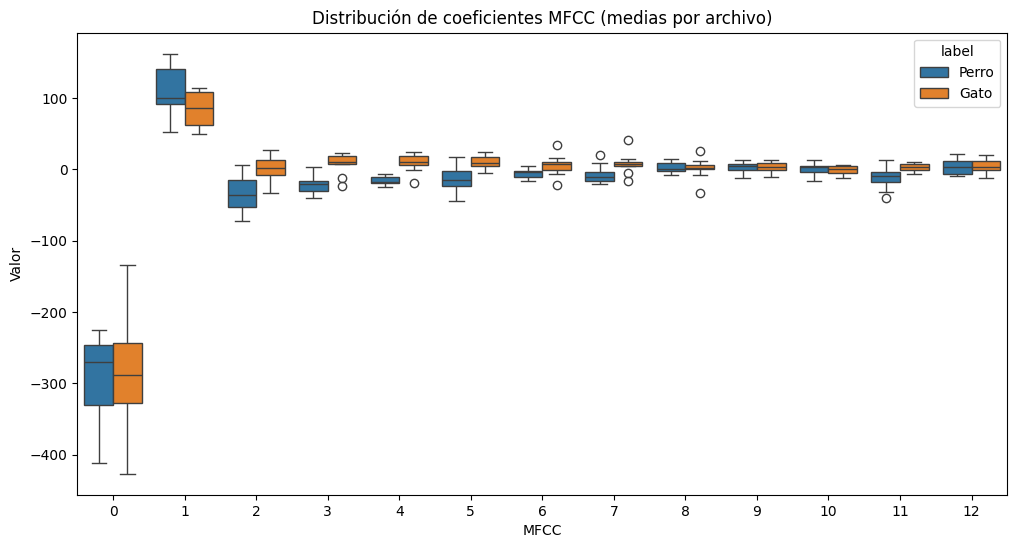

In [20]:
import seaborn as sns
import pandas as pd

def get_mfcc_summary(dir_path, label, n_files=10):
    mfcc_list = []
    for i, file in enumerate(os.listdir(dir_path)):
        if i >= n_files: break
        y, sr = librosa.load(os.path.join(dir_path, file), sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = mfcc.mean(axis=1)
        mfcc_list.append(mfcc_mean)
    df = pd.DataFrame(mfcc_list)
    df['label'] = label
    return df

df_dog = get_mfcc_summary(dog_dir, 'Perro')
df_cat = get_mfcc_summary(cat_dir, 'Gato')

df_mfcc = pd.concat([df_dog, df_cat])
df_melted = df_mfcc.melt(id_vars='label', var_name='MFCC', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(x='MFCC', y='Valor', hue='label', data=df_melted)
plt.title('Distribución de coeficientes MFCC (medias por archivo)')
plt.show()


#🎧 Análisis de Energía de la Señal vs Tiempo de Perro y Gato

La energía de la señal es una medida fundamental para entender la variabilidad de las amplitudes de la señal de audio a lo largo del tiempo. En este análisis, comparamos la energía de las señales de audio de perros y gatos, mostrando cómo varía en función del tiempo para los primeros archivos de cada clase.

El código a continuación calcula la energía de la señal utilizando el cuadrado de las amplitudes de la señal y luego visualiza cómo cambia a lo largo del tiempo para los audios de perros y gatos:

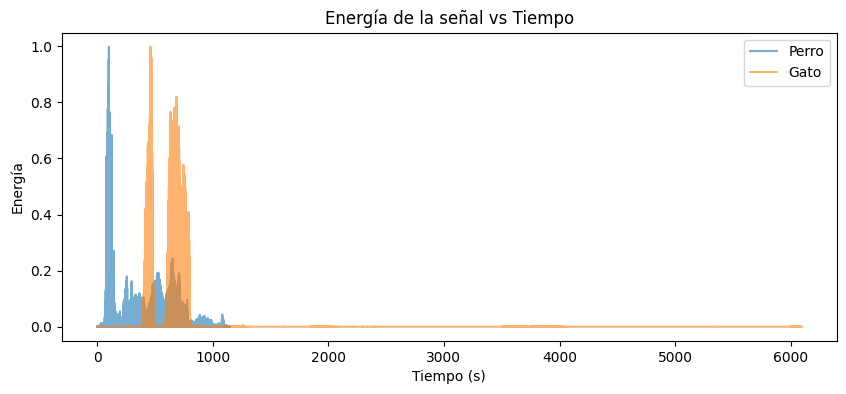

In [21]:
def plot_energy(y, sr, label):
    energy = np.square(y)
    frames = range(len(energy))
    t = librosa.frames_to_time(frames, sr=sr)

    plt.plot(t, energy, alpha=0.6, label=label)

y1, sr1 = librosa.load(os.path.join(dog_dir, os.listdir(dog_dir)[0]), sr=None)
y2, sr2 = librosa.load(os.path.join(cat_dir, os.listdir(cat_dir)[0]), sr=None)

plt.figure(figsize=(10,4))
plot_energy(y1, sr1, 'Perro')
plot_energy(y2, sr2, 'Gato')
plt.legend()
plt.title('Energía de la señal vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.show()

